## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [4]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [5]:
df.converted.mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [6]:
df.query('group == "control" & landing_page == "new_page"').count()[0] \
+ df.query('group == "treatment" & landing_page == "old_page"').count()[0]

3893

f. Do any of the rows have missing values?

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


***No rows with missing values***


`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

- Create a list of row indices to remove

In [8]:
remove_rows = \
(df.query('group == "control" & landing_page == "new_page"').index).append \
(df.query('group == "treatment" & landing_page == "old_page"').index)
len(remove_rows)
remove_rows

Int64Index([    22,    240,    490,    846,    850,    988,   1198,   1354,
              1474,   1877,
            ...
            293240, 293302, 293391, 293443, 293530, 293773, 293817, 293917,
            294014, 294252],
           dtype='int64', length=3893)

- Create a new dataframe with specified rows been removed

In [9]:
df2 = df.drop(remove_rows, axis=0)

In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

***Looks good!***

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [11]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
df2[df2.user_id.duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [13]:
df2.query('user_id == "773192"')

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


***Both rows seems to hold similar data but just taken at different timestamps***

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [14]:
df2.drop(2893, axis=0, inplace=True)
df2[df2.user_id.duplicated()]

,user_id,timestamp,group,landing_page,converted


***No more duplicate user IDs***

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [15]:
df2.head()
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [16]:
df2.query('group == "control"').converted.mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [17]:
df2.query('group == "treatment"').converted.mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [18]:
df2.query('landing_page == "new_page"').count()[0]/len(df2)

0.50006194422266881

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

According to initial insights, there is no significant evidence that the new page leads to more conversion. In fact, the percentage of conversion is slightly lower for new page. However, since the percentage difference is indistinguishable between groups, we can't make practical conclusions in favor of either group yet.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

- ***Null Hypothesis H0***: New page is as good as the old one, or even worse. 
- ***Alternative Hypothesis H1***: New page is better than the old one.  
  
<center> H0: **$p_{new}$** - **$p_{old}$** $\leq$ 0</center>
<center> H1: **$p_{new}$** - **$p_{old}$** $>$ 0</center>
   
 




`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

In [19]:
sample_size = df2.shape[0]

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [20]:
p_new = df2['converted'].mean()
print(p_new)

0.119597087245


b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [21]:
p_old = df2['converted'].mean()
print(p_old)

0.119597087245


c. What is $n_{new}$, the number of individuals in the treatment group?

In [22]:
n_new = df2.query('group == "treatment"').count()[0]
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [23]:
n_old = df2.query('group == "control"').count()[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [24]:
new_page_converted = np.random.binomial(1, p_new, n_new)

***Note:*** *Using integer, **1**, means sample will be generated from the range of 0 to integer. [0,1]*

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [25]:
old_page_converted = np.random.binomial(1,p_old, n_old)

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [26]:
p_new_2 = new_page_converted.mean()
p_old_2 = old_page_converted.mean()
diff = p_new_2 - p_old_2
diff

-0.0014547120769597688

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [27]:
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.binomial(1, p_new, n_new)
    old_page_converted = np.random.binomial(1,p_old, n_old)
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())
    
p_diffs = np.array(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

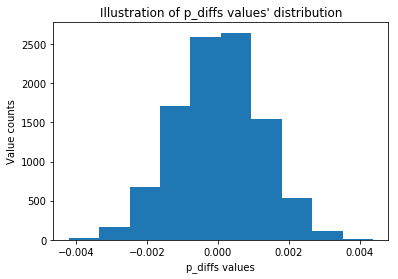

In [28]:
plt.hist(p_diffs);

plt.title("Illustration of p_diffs values' distribution")
plt.xlabel('p_diffs values')
plt.ylabel('Value counts');

*Given that we assume no difference between **$p_{new}$** & **$p_{old}$** under null hypothesis, it's fairly expected that the distribution of pdiff is centered around 0. Also, most values doesn't deviate far from zero which is also expected*

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [29]:
actual_pdiff = df2.query('group == "treatment"').converted.mean() - \
                df2.query('group == "control"').converted.mean()

print(actual_pdiff)
print((p_diffs > actual_pdiff).mean()) #P-value

-0.00157823898536
0.905


***This seems a very large P-value!***

- Next, will plot the same null distribution with more information comparing actual p_diff to alpha value. It's beneficial to see whether p_diff is within confidence interval under the null.


In [30]:
alpha = np.percentile(p_diffs, 95) 
alpha

0.0019732161072561821

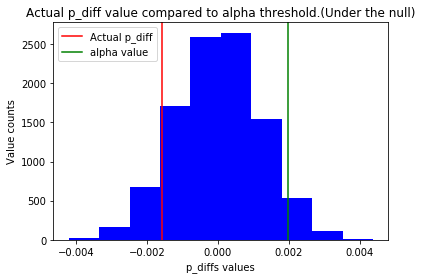

In [31]:
plt.hist(p_diffs, color='b');
plt.axvline(x=actual_pdiff, color='r', label='Actual p_diff');
plt.axvline(x=alpha, color='g', label='alpha value');


plt.title("Actual p_diff value compared to alpha threshold.(Under the null)")
plt.xlabel('p_diffs values')
plt.ylabel('Value counts')
plt.legend();

**Note:** *actual_pdiff* seems within the bound of 95% confidence interval for the null distribution (since it's smaller than alpha threshold, 1-side) which may indicate no significant difference in user conversion between pages

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

The scientific name of the value computed above is **P-value** which is basically the probability of obtaining an observed statistic or even more extreme value, given the null hypothesis is true. If the P-value is small, it means that it is highly unlikely to obtain this statistic given null hypothesis is true, and vice versa.

- In terms of difference between new & old pages: With a significance level of 5% (type-1 error threshold) , P-value is clearly very large.  
- Since **pval > α** so we fail to reject H0.  which entails that we can't conclude there that the new page is better than the old one



l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [32]:
import statsmodels.api as sm

convert_old = df2.query('landing_page == "old_page"')['converted'].sum()
convert_new = df2.query('landing_page == "new_page"')['converted'].sum()
n_old = df2.query('landing_page == "old_page"').shape[0]
n_new = df2.query('landing_page == "new_page"').shape[0]


/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [33]:
count = np.array([convert_old, convert_new])
nobs = np.array([n_old, n_new])
z_score, p_val = sm.stats.proportions_ztest(count, nobs, alternative='smaller')
z_score, p_val

(1.3109241984234394, 0.90505831275902449)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

- With a relatively small Z-score( the number of standard deviations an observed value is far from the mean), the p-value associated with it is generally large which would indicate no significant evidence in favor of alternative hypothesis.
- P-value is around 0.9050 which approximately equals values calculated earlier. Findings are consistent with ones obtained in parts j, k. Again, we fail to reject H0

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

- Since the dependant variable can take only 2 possible outcomes, I'll use **Logistic Regression**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [34]:
df2['intercept'] = 1
df2['ab_page'] = pd.get_dummies(df['group'])['treatment']
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [35]:
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

In [36]:
logit_model = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [37]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sat, 11 Jul 2020   Pseudo R-squ.:               8.077e-06
Time:                        16:15:59   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

- In part II, p-value related to proving whether reject null hypothesis   
(H1: 𝑝𝑛𝑒𝑤  -  𝑝𝑜𝑙𝑑   >  0) 

- Here, p-value relates to whether an explanatory variable (ab_page) has a significant impact on dependant variable(conversion). 
This means that whether H0 = H1 or not!  
- So **new hypotheses** are:  
<center> H0:  𝑝𝑛𝑒𝑤  =  𝑝𝑜𝑙𝑑  </center>
<center> H1:  𝑝𝑛𝑒𝑤  $\neq$ 𝑝𝑜𝑙𝑑 </center>

 
 

*This two sided test will naturally lead to a different p-value*


f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

Adding more terms to the regression model have some positive & negative effects: 
- **Advantage:** It gives a new term for the model to use to fit the data. If the new variable correlates with the response variable Y, it will lead to a better-fit model. For example, we may consider the impact of daytime/night-time on user conversion.
- **Disadvantage:** However, sometimes, adding a variable can make matters worse. For example, if the new variable correlates with another explanatory variable, it may lead to misleading coeffecient values (positive correlations instead of negative or vice versa)


g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [38]:
df_countries = pd.read_csv('countries.csv')
df_countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


- Will perform a left join to know whether there are users in df2 which not exist in countries_df

In [39]:
df3 = df2.set_index('user_id').join \
   (df_countries.set_index('user_id'), how='left')
df3.tail(3)

,timestamp,group,landing_page,converted,intercept,ab_page,country
user_id,,,,,,,
734608,2017-01-22 11:45:03.439544,control,old_page,0,1,0,US
697314,2017-01-15 01:20:28.957438,control,old_page,0,1,0,US
715931,2017-01-16 12:40:24.467417,treatment,new_page,0,1,1,UK


In [40]:
df3.isnull().sum()

timestamp       0
group           0
landing_page    0
converted       0
intercept       0
ab_page         0
country         0
dtype: int64

**There doesn't seem to be any null values which means perfect match of user_IDs for both dataframes** 

- Create columns for dummy values

In [41]:
df3[['CA', 'UK', 'US']] = pd.get_dummies(df3['country'])


In [42]:
df3.drop('CA', axis=1, inplace=True)
df3.tail(3)

,timestamp,group,landing_page,converted,intercept,ab_page,country,UK,US
user_id,,,,,,,,,
734608,2017-01-22 11:45:03.439544,control,old_page,0,1,0,US,0,1
697314,2017-01-15 01:20:28.957438,control,old_page,0,1,0,US,0,1
715931,2017-01-16 12:40:24.467417,treatment,new_page,0,1,1,UK,1,0


In [43]:
logit_model_2 = sm.Logit(df3['converted'], \
                       df3[['intercept', 'ab_page', 'UK', 'US']])
results_2 = logit_model_2.fit()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


In [44]:
results_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sat, 11 Jul 2020   Pseudo R-squ.:               2.323e-05
Time:                        16:16:00   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
US             0.0408      0.027      1.516      0.130      -0.012       0.093
==============================================================================
"""

***Both US & UK users have high p-values which may indicate that  countries doesn't play a significant role in user conversion***

In [45]:
1/np.exp(0.0506), 1/np.exp(0.0408)

(0.95065885803307093, 0.96002111497165088)

***Also, there doesn't seem to be a significant difference between US/UK users and baseline (CA) users in terms of conversion rate***

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [46]:
df3['ab_page_UK'] = df3.ab_page*df3.UK
df3['ab_page_US'] = df3.ab_page*df3.US
df3.tail()

,timestamp,group,landing_page,converted,intercept,ab_page,country,UK,US,ab_page_UK,ab_page_US
user_id,,,,,,,,,,,
751197,2017-01-03 22:28:38.630509,control,old_page,0,1,0,US,0,1,0,0
945152,2017-01-12 00:51:57.078372,control,old_page,0,1,0,US,0,1,0,0
734608,2017-01-22 11:45:03.439544,control,old_page,0,1,0,US,0,1,0,0
697314,2017-01-15 01:20:28.957438,control,old_page,0,1,0,US,0,1,0,0
715931,2017-01-16 12:40:24.467417,treatment,new_page,0,1,1,UK,1,0,1,0


In [47]:
logit_model_3 = sm.Logit(df3['converted'], \
                       df3[['intercept', 'ab_page', 'UK', 'US', 'ab_page_UK', 'ab_page_US']])
results_3 = logit_model_3.fit()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


In [48]:
results_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Sat, 11 Jul 2020   Pseudo R-squ.:               3.482e-05
Time:                        16:16:01   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0040      0.036    -55.008      0.000      -2.075      -1.933
ab_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
UK             0.0118      0.040      0.296      0.767      -0.066       0.090
US             0.0175      0.038      0.465      0.642      -0.056       0.091
ab_page_UK     0.0783      0.057      1.378      0.168      -0.033       0.190
ab_page_US     0.0469      0.054      0.872      0.383      -0.059       0.152
==============================================================================
"""

***Again, with large p-values, interaction between countries and ab_page didn't add much infromation to the model***

## Conclusions 
Given the data we have, we may conclude that new page doesn't have a significant on user conversion. This is true using both A/B testing and regression modelling. Actually, based on the current data we can see a slight difference in conversion in favor of the old page.  
- Practically speaking, a very small difference in actual number of conversions between both pages exists. Such a small  number that is in favor of old page and doesn't make practical sense anyway. That said, more data points or an extended testing period may potentially have an impact on results.  

## Limitations
Although we couldn't find a signficant conversion in favor of new page, we have to be cautious with our conclusions. One indication of being conservative is **failing to reject** the null hypothesis **rather than accepting it**. This is to say that null hypothesis is not the absolute truth but rather, given the data we have and the methods we use, we can't conclude that the new page is better.

## References

- *What is a Z score What is a p-value*
http://resources.esri.com/help/9.3/arcgisengine/java/gp_toolref/spatial_statistics_toolbox/what_is_a_z_score_what_is_a_p_value.htm
- *One-sample test for proportion*   
https://stackoverflow.com/questions/53148935/one-sample-test-for-proportion
- *When to Use Logistic Regression*  
 http://logisticregressionanalysis.com/33-when-to-use-logistic-regression/
- *Adding more variables to regression*  
https://stats.stackexchange.com/questions/52067/does-adding-more-variables-into-a-multivariable-regression-change-coefficients-o